### Configuração Inicial

In [1]:
!pip install -U plotly

     |████████████████████████████████| 13.2MB 269kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
!pip install -q yfinance

     |████████████████████████████████| 6.3MB 11.1MB/s 


In [3]:
import yfinance as yf
import plotly.express as px
import plotly.figure_factory as ff

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
def fix_col_names(df):
  return ['IBOV' if col =='^BVSP' else col.rstrip('.SA') for col in df.columns]

### 1. Obtendo os dados e calculando retornos log

In [5]:
tickers = ['^BVSP', 'VALE3.SA','PETR4.SA', 'MGLU3.SA', 'TAEE11.SA']
prices  = yf.download(tickers, period='3y')['Adj Close']
prices.columns = fix_col_names(prices)
retornos = np.log(prices / prices.shift(1)).dropna()
ativos   = retornos.columns.to_list()

[*********************100%***********************]  5 of 5 completed


### 2. Analisando Graficamente

#### Histograma

In [10]:
fig = ff.create_distplot( [retornos[ativo] for ativo in ativos], ativos,  bin_size=.003, show_rug=False, curve_type='normal')
fig.layout.title = 'Histograma de Retornos Diários' 
fig.layout.xaxis.title = 'Retorno Log'
fig.layout.yaxis.title = 'Ocorrências'

fig.update_layout(width=1000, height=800, bargap=0.01)
fig.show()

#### BoxPlot

In [11]:
px.box(retornos,height=500, title='Gráfico de Box-Plot', labels=dict(variable='Ativos', value='Log Retorno Diário'))

#### Gráfico Q-Q (quantil-quantil)

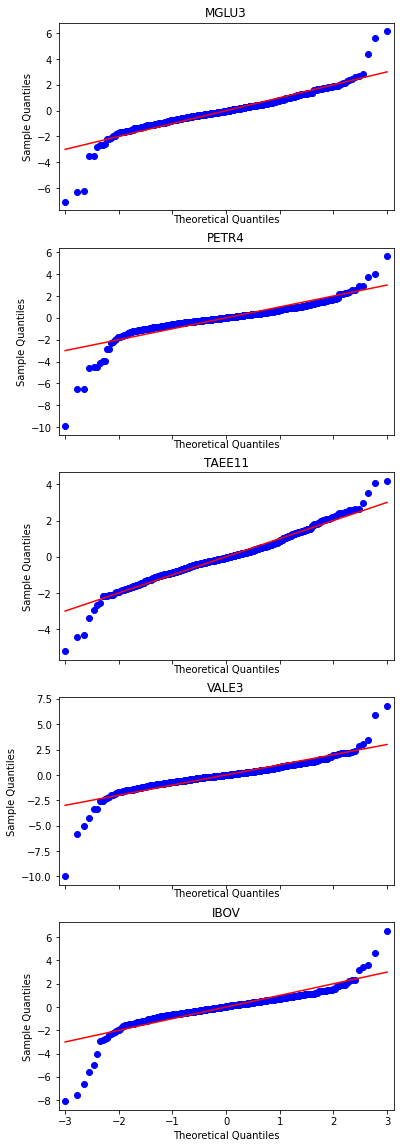

In [13]:
fig, ax = plt.subplots(len(ativos), figsize=(6,20), sharex=True)
for i, ativo in enumerate(ativos):
  ax[i].set_title(ativo)
  sm.qqplot(  retornos[ativo], ax=ax[i], dist=stats.norm, fit=True,  line='s')

### 3. Calculando medidas estatísticas

In [14]:
retornos.skew()

MGLU3    -0.458721
PETR4    -2.178627
TAEE11   -0.008907
VALE3    -1.124748
IBOV     -1.623129
dtype: float64

In [15]:
retornos.kurtosis()

MGLU3     10.482202
PETR4     21.379211
TAEE11     2.643985
VALE3     20.233949
IBOV      17.361979
dtype: float64

In [ ]:
resumo = retornos.agg(['size', 'max', 'min','mean', 'std', 'skew','kurt'])
resumo

### 4. Testes de Normalidade

#### Teste de Hipóteses

$H_0$ = Hipótese nula - Os dados seguem uma distribuição Normal

$H_a$ = Hipótese alternativa - Os dados **não** seguem uma distribuição Normal

|Nivel de Significância | Decisão|
|---|---|
|$p < 0.01$| Evidência muito forte contra $H_0$|
|$ 0.01 < p < 0.05$| Evidência forte contra $H_0$|
|$ 0.05 < p < 0.10$| Evidência fraca contra $H_0$|
|$ p > 0.1 $| Pouquísima Evidência contra $H_0$|

#### Teste de Assimetria

In [20]:
[print(f'{ativo}: p = {stats.skewtest( retornos[ativo])[1]:.10f}') for ativo in ativos];

MGLU3: p = 0.0000009720
PETR4: p = 0.0000000000
TAEE11: p = 0.9206968839
VALE3: p = 0.0000000000
IBOV: p = 0.0000000000


#### Teste de Curtose

In [18]:
[print(f'{ativo}: p = {stats.kurtosistest(retornos[ativo])[1]:.10f}') for ativo in ativos];

MGLU3: p = 0.0000000000
PETR4: p = 0.0000000000
TAEE11: p = 0.0000000000
VALE3: p = 0.0000000000
IBOV: p = 0.0000000000


#### Teste Completo

In [19]:
[print(f'{ativo}: p = {stats.normaltest(retornos[ativo])[1]:.10f}') for ativo in ativos];

MGLU3: p = 0.0000000000
PETR4: p = 0.0000000000
TAEE11: p = 0.0000000000
VALE3: p = 0.0000000000
IBOV: p = 0.0000000000
